<a href="https://colab.research.google.com/github/AmaraNecib/hadith-data/blob/main/Scrapping_Hadith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install selenium
!pip install webdriver_manager
!pip install pymongo
!pip install config_hadith
!pip install pandas
!pip install datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 17.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement config_hadith (from versions: none)
ERROR: No matching distribution found for config_hadith
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 14.1 MB/s eta 0:00:00


In [8]:
# from config_hadith import *
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import os
from time import sleep
from math import ceil

import pymongo
from datetime import datetime
import pandas as pd

import pymongo



In [ ]:

# client = pymongo.MongoClient()
# db = client.Hasdiths


In [23]:
try:
    current_path= os.path.dirname(os.path.abspath(__file__))
except:
    current_path = '.'

In [12]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

def init_driver(gecko_driver='', user_agent='', load_images=True, is_headless=False):
    options = Options()
    if user_agent:
        options.set_preference("general.useragent.override", user_agent)
    if not load_images:
        options.set_preference('permissions.default.image', 2)

    options.set_preference("media.volume_scale", "0.0")
    options.set_preference("dom.webnotifications.enabled", False)
    options.headless = is_headless

    driver = webdriver.Firefox(options=options)  # No need for executable_path from Selenium 4

    return driver




In [79]:
import urllib.request
from bs4 import BeautifulSoup
import csv
import re


# Specify the additional columns you want to add
additional_column1 = "المصدر"
additional_column2 = "رقم الحديث"
additional_column3 = "رقم الباب"
additional_column4 = "الباب"
# list using range
pages = list(range(1, 98))
print(pages)
# Example: Fetching data from a URL


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [80]:
i = 1
for page in pages:
  url = f'https://sunnah.com/bukhari/{page}'
  with urllib.request.urlopen(url) as response:
      webpage_content = response.read()

  # Step 2: Parse the HTML with BeautifulSoup
  soup = BeautifulSoup(webpage_content, 'html.parser')

  # Step 3: Extract everything inside the class 'mainContainer'
  main_container = soup.find_all(class_="mainContainer")  # Finds all elements with class 'mainContainer'
  arabicchapter = soup.find_all(class_="arabicchapter")[0].text.strip()

  print(arabicchapter)
  arabic_hadith_texts = []
  for container in main_container:
      arabic_sanad_elements = container.find_all(class_="arabic_text_details")  # Find elements with class 'arabic_sanad'

      for element in arabic_sanad_elements:
          text = element.get_text(strip=True)
          clean_text = text.replace('\u200f', '').strip('"')  # Remove \u200f and strip quotation marks from start and end
          arabic_hadith_texts.append(clean_text)

  csv_file = 'hadiths.csv'

  # Check if the file already exists
  file_exists = os.path.isfile(csv_file)
  # Open the CSV file for writing
  with open('hadiths.csv', mode='a', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the header row only if the file doesn't exist
    if not file_exists:
        writer.writerow(['الحديث', additional_column1, additional_column2, additional_column3, additional_column4])

    # Iterate through the hadith texts and write each one to the CSV
    for hadith in arabic_hadith_texts:
        # Define the values for the additional columns (replace these with actual data as needed)
        # Write the hadith and additional columns
        writer.writerow([hadith, "صحيح البخاري", i, page,arabicchapter])

        # Increment the counter
        i += 1
# Confirmation message
# print("Data has been written to hadiths.csv.")
# for container in main_container:
#     print(container.prettify())


باب كَيْفَ كَانَ بَدْءُ الْوَحْىِ إِلَى رَسُولِ اللَّهِ صلى الله عليه وسلم
بَابُ الإِيمَانِ وَقَوْلِ النَّبِيِّ صَلَّى اللَّهُ عَلَيْهِ وَسَلَّمَ: «بُنِيَ الإِسْلاَمُ عَلَى خَمْسٍ»
بَابُ فَضْلِ الْعِلْمِ
بَابُ مَا جَاءَ فِي الْوُضُوءِ
باب الْوُضُوءِ قَبْلَ الْغُسْلِ
باب كَيْفَ كَانَ بَدْءُ الْحَيْضِ
باب
باب كَيْفَ فُرِضَتِ الصَّلاَةُ فِي الإِسْرَاءِ
باب مَوَاقِيتِ الصَّلاَةِ وَفَضْلِهَا
باب بَدْءُ الأَذَانِ
باب فَرْضِ الْجُمُعَةِ
باب صَلاَةِ الْخَوْفِ
باب فِي الْعِيدَيْنِ وَالتَّجَمُّلِ فِيهِ
باب مَا جَاءَ فِي الْوِتْرِ
باب الاِسْتِسْقَاءِ وَخُرُوجِ النَّبِيِّ صلى الله عليه وسلم فِي الاِسْتِسْقَاءِ
باب الصَّلاَةِ فِي كُسُوفِ الشَّمْسِ
باب مَا جَاءَ فِي سُجُودِ الْقُرْآنِ وَسُنَّتِهَا
باب مَا جَاءَ فِي التَّقْصِيرِ وَكَمْ يُقِيمُ حَتَّى يَقْصُرَ
باب التَّهَجُّدِ بِاللَّيْلِ
باب فَضْلِ الصَّلاَةِ فِي مَسْجِدِ مَكَّةَ وَالْمَدِينَةِ
باب اسْتِعَانَةِ الْيَدِ فِي الصَّلاَةِ إِذَا كَانَ مِنْ أَمْرِ الصَّلاَةِ
باب مَا جَاءَ فِي السَّهْوِ إِذَا قَامَ مِنْ رَكْعَتَىِ الْفَرِيضَةِ
باب فِي الْجَن

In [43]:
# use i to print it and the hadith
for hadith in arabic_hadith_texts:
    print(hadith)

# i want to save this to csv and add two column or there in each one


إِنَّمَا الْأَعْمَالُ بِالنِّيَّاتِ، وَإِنَّمَا لِكُلِّ امْرِئٍ مَا نَوَى، فَمَنْ كَانَتْ هِجْرَتُهُ إِلَى دُنْيَا يُصِيبُهَا أَوْ إِلَى امْرَأَةٍ يَنْكِحُهَا، فَهِجْرَتُهُ إِلَى مَا هَاجَرَ إِلَيْهِ 
 أَحْيَانًا يَأْتِينِي مِثْلَ صَلْصَلَةِ الْجَرَسِ ـ وَهُوَ أَشَدُّهُ عَلَىَّ ـ فَيُفْصَمُ عَنِّي وَقَدْ وَعَيْتُ عَنْهُ مَا قَالَ، وَأَحْيَانًا يَتَمَثَّلُ لِيَ الْمَلَكُ رَجُلاً فَيُكَلِّمُنِي فَأَعِي مَا يَقُولُ 
حَدَّثَنَا يَحْيَى بْنُ بُكَيْرٍ، قَالَ حَدَّثَنَا اللَّيْثُ، عَنْ عُقَيْلٍ، عَنِ ابْنِ شِهَابٍ، عَنْ عُرْوَةَ بْنِ الزُّبَيْرِ، عَنْ عَائِشَةَ أُمِّ الْمُؤْمِنِينَ، أَنَّهَا قَالَتْ أَوَّلُ مَا بُدِئَ بِهِ رَسُولُ اللَّهِ صلى الله عليه وسلم مِنَ الْوَحْىِ الرُّؤْيَا الصَّالِحَةُ فِي النَّوْمِ، فَكَانَ لاَ يَرَى رُؤْيَا إِلاَّ جَاءَتْ مِثْلَ فَلَقِ الصُّبْحِ، ثُمَّ حُبِّبَ إِلَيْهِ الْخَلاَءُ، وَكَانَ يَخْلُو بِغَارِ حِرَاءٍ فَيَتَحَنَّثُ فِيهِ ـ وَهُوَ التَّعَبُّدُ ـ اللَّيَالِيَ ذَوَاتِ الْعَدَدِ قَبْلَ أَنْ يَنْزِعَ إِلَى أَهْلِهِ، وَيَتَزَوَّدُ لِذَلِكَ، ثُمَّ يَرْجِعُ إِل

Data has been written to hadiths.csv.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [81]:
# read data from Sahih Bukhari.csv

df = pd.read_csv(current_path+'/hadiths.csv')
#  show the last 2
df.tail(2)
# df.head()

,الحديث,المصدر,رقم الحديث,رقم الباب,الباب
7275,حَدَّثَنَا أَبُو النُّعْمَانِ، حَدَّثَنَا مَهْ...,صحيح البخاري,7276,97,باب مَا جَاءَ فِي دُعَاءِ النَّبِيِّ صلى الله ...
7276,كَلِمَتَانِ حَبِيبَتَانِ إِلَى الرَّحْمَنِ، خ...,صحيح البخاري,7277,97,باب مَا جَاءَ فِي دُعَاءِ النَّبِيِّ صلى الله ...


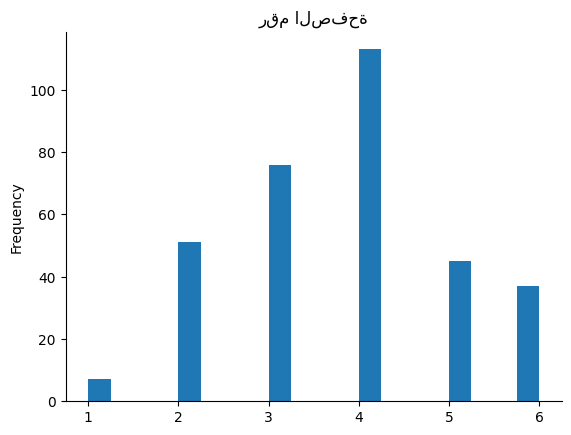

In [68]:
# @title رقم الصفحة

from matplotlib import pyplot as plt
df['رقم الصفحة'].plot(kind='hist', bins=20, title='رقم الصفحة')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
driver = init_driver()


WebDriverException: Message: Process unexpectedly closed with status 1


# 1- Sahih Bukhari

In [ ]:
MAX_PAGE_NUM = 141
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/0/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
#         hadith_info= {
#         "Hadith": hadith_words.text
#         }
#         db.hadith.insert_one(hadith_info)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sahih Bukhari'])
df_hadith.to_csv('Sahih Bukhari.csv', index = False)



In [ ]:
# pd.DataFrame(list(db.hadith.find()))['Hadith'].head()

In [ ]:
# data = pd.read_csv('Bukhary_Mongo.csv')
# data.head()

# 2- Sahih Muslime

In [ ]:
MAX_PAGE_NUM = 108
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/1/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sahih Muslim'])
df_hadith.to_csv('Sahih Muslim.csv', index = False)

# 3- Sunan al Tirmidhi

In [ ]:
MAX_PAGE_NUM = 78
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/2/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan al Tirmidhi'])
df_hadith.to_csv('Sunan al Tirmidhi.csv', index = False)

# 4- Sunan al-Nasai

In [ ]:
MAX_PAGE_NUM = 114
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/3/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan al-Nasai'])
df_hadith.to_csv('Sunan al-Nasai.csv', index = False)

# 5- Sunan Abu Dawud

In [ ]:
MAX_PAGE_NUM = 92
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/4/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan Abu Dawud'])
df_hadith.to_csv('Sunan Abu Dawud.csv', index = False)

# 6- Sunan Ibn Maja

In [ ]:
MAX_PAGE_NUM = 87
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/5/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan Ibn Maja'])
df_hadith.to_csv('Sunan Ibn Maja.csv', index = False)

# 7- Musnad Ahmad ibn Hanbal

In [ ]:
MAX_PAGE_NUM = 528
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/6/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Musnad Ahmad ibn Hanbal'])
df_hadith.to_csv('Musnad Ahmad ibn Hanbal.csv', index = False)

# 8- Maliks Muwatta

In [ ]:
MAX_PAGE_NUM = 32
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/7/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Maliks Muwatta'])
df_hadith.to_csv('Maliks Muwatta.csv', index = False)

# 9- Sunan al Darami

In [ ]:
MAX_PAGE_NUM = 68
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/8/{page_num}/"
    driver.get(url)
    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan al Darami'])
df_hadith.to_csv('Sunan al Darami.csv', index = False)

In [ ]:
# df_hadith.head()

In [ ]:
# df_hadith['Sahih Bukhari'][0]

# 1- Sahih Bukhari Without Tashkel

In [ ]:
MAX_PAGE_NUM = 141
MAX_PANG_DIG = 3
list_of_hadiths = []
flag = 0
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/0/{page_num}/"
    driver.get(url)

#     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sahih Bukhari Without_Tashkel'])
df_hadith.to_csv('Sahih Bukhari Without_Tashkel.csv', index = False)

# 2- Sahih Muslime Without Tashkel

In [ ]:
MAX_PAGE_NUM = 108
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/1/{page_num}/"
    driver.get(url)

    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sahih Muslime Without_Tashkel'])
df_hadith.to_csv('Sahih Muslime Without_Tashkel.csv', index = False)

# 3- Sunan al Tirmidhi Without Tashkel

In [ ]:
MAX_PAGE_NUM = 78
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/2/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan al Tirmidhi Without_Tashkel'])
df_hadith.to_csv('Sunan al Tirmidhi Without_Tashkel.csv', index = False)

# 4- Sunan al-Nasai Without Tashkel

In [ ]:
MAX_PAGE_NUM = 114
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/3/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan al-Nasai Without_Tashkel'])
df_hadith.to_csv('Sunan al-Nasai Without_Tashkel.csv', index = False)

# 5- Sunan Abu Dawud Without Tashkel

In [ ]:
MAX_PAGE_NUM = 92
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/4/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan Abu Dawud Without_Tashkel'])
df_hadith.to_csv('Sunan Abu Dawud Without_Tashkel.csv', index = False)

# 6- Sunan Ibn Maja Without Tashkel

In [ ]:
MAX_PAGE_NUM = 87
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/5/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan Ibn Maja Without_Tashkel'])
df_hadith.to_csv('Sunan Ibn Maja Without_Tashkel.csv', index = False)

# 7- Musnad Ahmad ibn Hanbal Without Tashkel

In [ ]:
MAX_PAGE_NUM = 528
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/6/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Musnad Ahmad ibn Hanbal Without_Tashkel'])
df_hadith.to_csv('Musnad Ahmad ibn Hanbal Without_Tashkel.csv', index = False)

# 8- Maliks Muwatta Without Tashkel

In [ ]:
MAX_PAGE_NUM = 32
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/7/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Maliks Muwatta Without_Tashkel'])
df_hadith.to_csv('Maliks Muwatta Without_Tashkel.csv', index = False)

# 9- Sunan al Darami Without Tashkel

In [ ]:
MAX_PAGE_NUM = 68
MAX_PANG_DIG = 3
list_of_hadiths = []
for i in range(1,MAX_PAGE_NUM+1):
    page_num = ((MAX_PANG_DIG - len(str(i))) * "0" + str(i))
    url = f"https://www.islambook.com/hadith/8/{page_num}/"
    driver.get(url)
    #     driver.find_element_by_css_selector('#hadith-frm .form-group .toggle-group .active').click() # work well
    # clicking on chage button
    if not flag:
        driver.find_element_by_class_name("toggle-on").click()
        flag = 1

    hadiths = driver.find_elements_by_class_name("panel-success")
    for hadith in hadiths:
        hadith_words = hadith.find_element_by_class_name("hadith")
        list_of_hadiths.append(hadith_words.text)
    sleep(1)

df_hadith = pd.DataFrame(list_of_hadiths, columns=['Sunan al Darami Without_Tashkel'])
df_hadith.to_csv('Sunan al Darami Without_Tashkel.csv', index = False)